## Task-03
### PRODIGY_DS_03
### Objective - Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.

In [26]:
#Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
# Load the dataset
data = pd.read_csv('bank-additional-full.csv', sep=';')


In [28]:
# Display the first few rows of the dataset
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [29]:
# Drop unwanted columns
columns_to_drop = ['marital', 'contact']
data.drop(columns=columns_to_drop, axis=1, inplace=True)


In [30]:
# Detecting duplicates
duplicates = data[data.duplicated()]
print(f'Number of duplicates: {len(duplicates)}')


Number of duplicates: 13


In [31]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['job', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])
    

In [32]:
# Select only numeric columns for correlation heatmap
numeric_columns = data.select_dtypes(include=['number']).columns


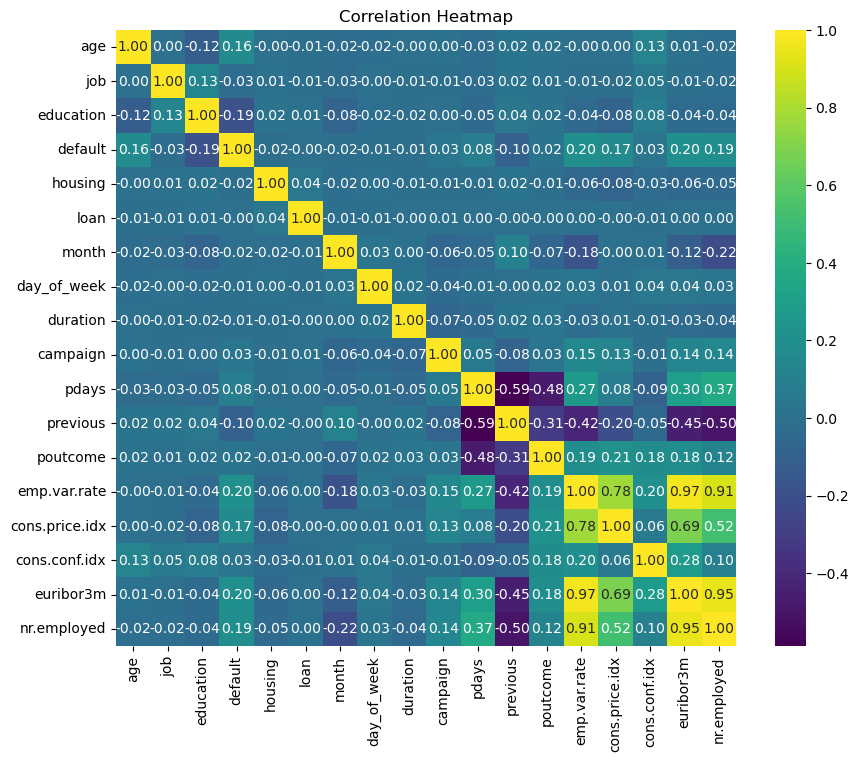

In [33]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_columns].corr(), cmap='viridis', annot=True, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


In [34]:
# Select features and target variable
selected_features = ['age', 'job', 'education', 'campaign', 'previous']  # Adjust these columns as needed
X = data[selected_features]
y = data['y']


In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Create and train the Decision Tree Classifier with more constraints
decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=50, min_samples_leaf=25, random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=25, min_samples_split=50,
                       random_state=42)

In [37]:
# Predict on the test set
y_pred = decision_tree.predict(X_test)


In [38]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


Accuracy: 0.8710852148579752
Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.97      0.93      7303
         yes       0.33      0.13      0.18       935

    accuracy                           0.87      8238
   macro avg       0.61      0.55      0.56      8238
weighted avg       0.83      0.87      0.85      8238



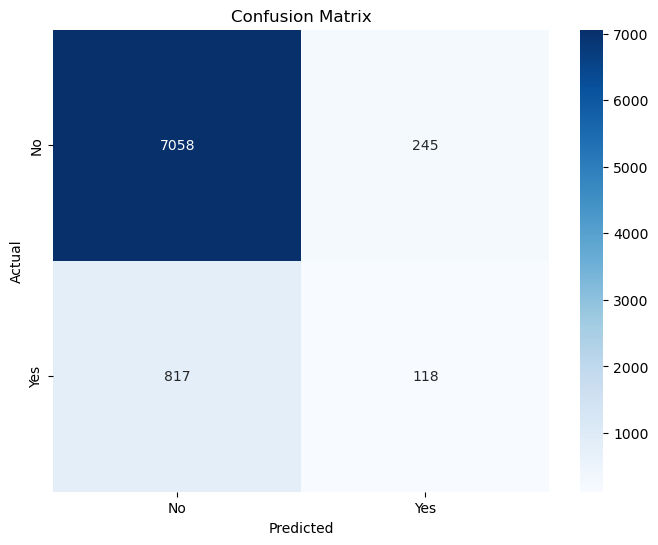

In [39]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


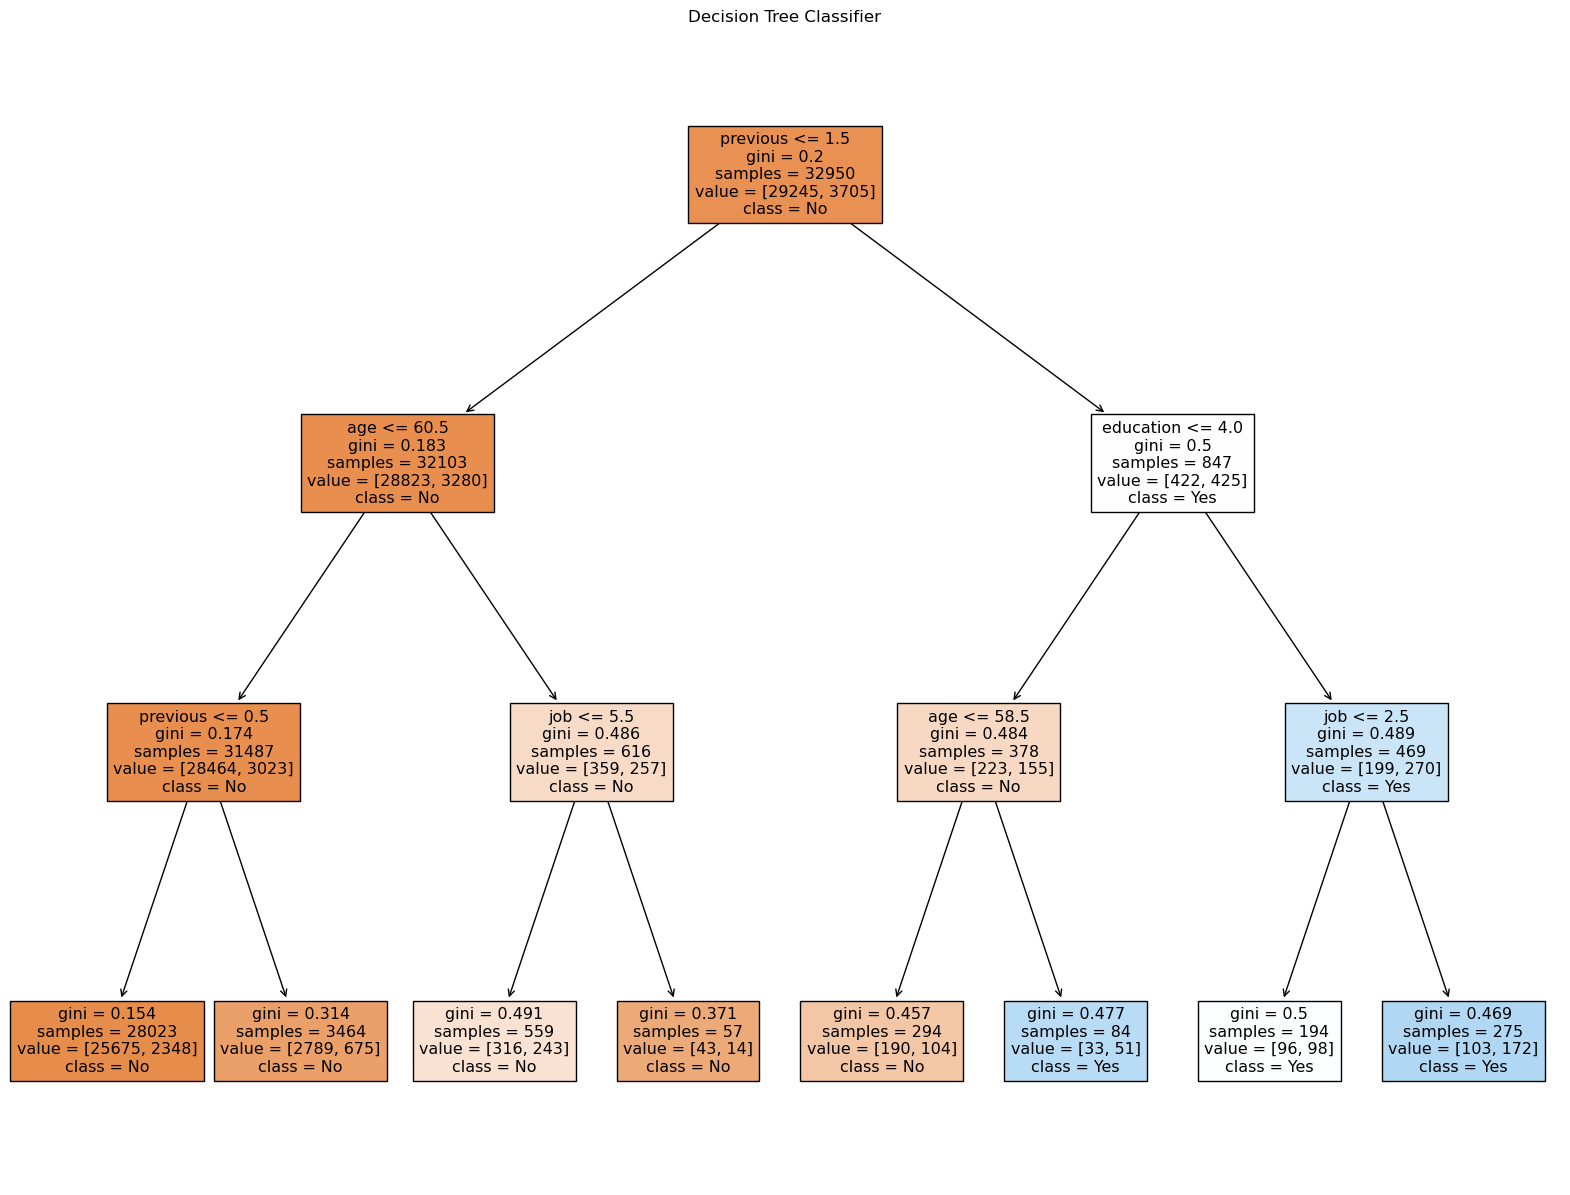

In [45]:
# Visualizing the decision tree
plt.figure(figsize=(20, 15))
plot_tree(decision_tree, feature_names=selected_features, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree Classifier')
plt.show()
